## Accessing Simulation Results

## Phasespace Plots

In [1]:
import em2d as zpic

#Simulation box
nx  = [ 200, 200]
box = [ 10.0, 10.0 ]

#Time parameters
dt = 0.014
tmax = 200.0

#Displays only part of the box (required for phasespace data)
sim_range = [[0,box[0]],[-0.3,0.3]]

#Stores zdf data for every ndump timesteps
ndump = 10

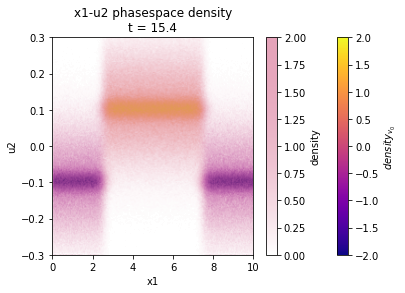

In [2]:
import zdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors 
from matplotlib.colors import ListedColormap

#Accesing ZDF Files
(data_eup,info) = zdf.read("up electrons/x1u2-001100.zdf")
(data_edown,info) = zdf.read("down electrons/x1u2-001100.zdf")
(data_iup,info) = zdf.read("up ions/x1u2-001100.zdf")
(data_idown,info) = zdf.read("down ions/x1u2-001100.zdf")

#Creating custom colormap 
# Choose colormap from white to a hexcode taken from the color at the middle of the other colorbar
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","#cc4976"])

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(1.0, 0.5, cmap.N )

# Create new colormap
my_cmap = ListedColormap(my_cmap)

pha1 = np.abs(data_eup)
pha1 /= np.max(pha1)

pha2 = np.abs(data_iup)
pha2 /= np.max(pha2)

pha3 = np.abs(data_edown)
pha3 /= np.max(pha3)

pha4 = np.abs(data_idown)
pha4 /= np.max(pha4)

plt.imshow( (pha1 + pha2) - (pha3 + pha4), origin = 'lower',
          extent = ( sim_range[0][0], sim_range[0][1], sim_range[1][0], sim_range[1][1] ),
          aspect = 'auto', cmap = 'plasma', vmin = -2.0, vmax = 2.0)

plt.colorbar(pad = 0.1).set_label('$density_{v_0}$')

plt.imshow( (pha1 + pha2) + (pha3 + pha4), origin = 'lower',
          extent = ( sim_range[0][0], sim_range[0][1], sim_range[1][0], sim_range[1][1] ),
          aspect = 'auto', cmap = my_cmap, vmax = 2.0)

plt.colorbar().set_label('density')

plt.xlabel("x1")
plt.ylabel("u2")
plt.title("x1-u2 phasespace density\nt = {:g}".format(info.iteration.t))
plt.show()

## Magnetic Field Animations

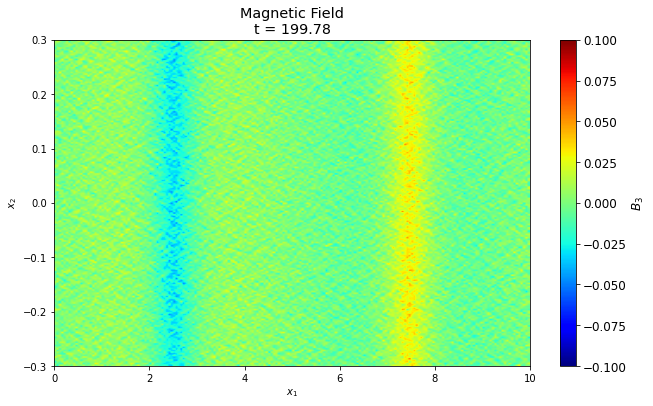

In [3]:
import zdf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors 

from matplotlib import animation
from IPython.display import display
import ipywidgets
import os

gif_description = "test.gif"

# Movie parameters
#nframes must be number of zdf data files 
nframes = 1428
fps = 16

# Create progress bar
bar   = ipywidgets.FloatProgress( min = 0, max = nframes )
label = ipywidgets.HTML()
prog  = ipywidgets.VBox(children=[label, bar])
display(prog)

fig, ax = plt.subplots()
plt.rc('font', size=12)   
fig.set_size_inches( (10.66,6.0) )

#Get ZDF data
(bfield,info) = zdf.read("EMF/B2-000000.zdf")

p1 = plt.imshow( bfield, interpolation = 'bilinear', origin = 'lower',
          extent = ( sim_range[0][0], sim_range[0][1], sim_range[1][0], sim_range[1][1] ),
          aspect = 'auto', cmap = 'jet')

plt.colorbar().set_label('$B_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Magnetic Field\nt = {:g}".format(info.iteration.t))

def animate(i):
    label.value = "Generating frame {:d}".format(i+1) +"/{:d} ...".format(nframes)
    bar.value = i
    
    #Iterates through all the ZDF data files 
    (bfield,info) = zdf.read("EMF/B2-" + "%05d" % (int(i)) + "0.zdf")

    p1.set_data(bfield)
    ax.set_title("Magnetic Field\nt = {:g}".format(info.iteration.t))
    
    return (p1,)

# Create the movie
anim = animation.FuncAnimation( fig, animate, frames = nframes, repeat = False, blit = True, interval = 1000.0/fps )

#Choose where file will be saved
path = r'zpic/'

#Create file name
gif_name = 'magnetic field ' + gif_description
f = os.path.join(gif_name)

writergif = animation.PillowWriter(fps)
anim.save(f, writer = writergif)

# Show the completed movie
label.value = "Done!"
bar.bar_style = "success"

## Charge Density Animation

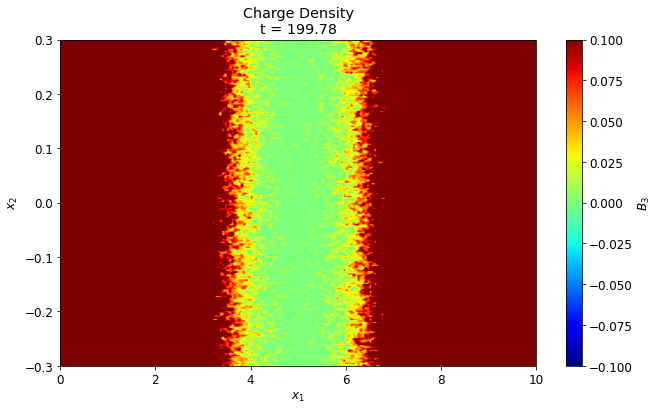

In [8]:
import zdf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors 

from matplotlib import animation
from IPython.display import display
import ipywidgets
import os

gif_description = "test ni down.gif"

# Movie parameters
#nframes must be number of zdf data files 
nframes = 1428
fps = 16

# Create progress bar
bar   = ipywidgets.FloatProgress( min = 0, max = nframes )
label = ipywidgets.HTML()
prog  = ipywidgets.VBox(children=[label, bar])
display(prog)

fig, ax = plt.subplots()
plt.rc('font', size=12)   
fig.set_size_inches( (10.66,6.0) )

#Get ZDF data
(up_ne,info) = zdf.read("up electrons/charge-000000.zdf")
(down_ne,info) = zdf.read("down electrons/charge-000000.zdf")
(up_ni,info) = zdf.read("up ions/charge-000000.zdf")
(down_ni,info) = zdf.read("up ions/charge-000000.zdf")

p1 = plt.imshow( bfield, interpolation = 'bilinear', origin = 'lower',
          extent = ( sim_range[0][0], sim_range[0][1], sim_range[1][0], sim_range[1][1] ),
          aspect = 'auto', cmap = 'jet')

plt.colorbar().set_label('$B_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Charge Density\nt = {:g}".format(info.iteration.t))

def animate(i):
    label.value = "Generating frame {:d}".format(i+1) +"/{:d} ...".format(nframes)
    bar.value = i
    
    #Iterates through all the ZDF data files
    (up_ne,info) = zdf.read("up electrons/charge-" + "%05d" % (int(i)) + "0.zdf")
    (down_ne,info) = zdf.read("down electrons/charge-" + "%05d" % (int(i)) + "0.zdf")
    (up_ni,info) = zdf.read("up ions/charge-" + "%05d" % (int(i)) + "0.zdf")
    (down_ni,info) = zdf.read("down ions/charge-" + "%05d" % (int(i)) + "0.zdf")
    
    p1.set_data(abs(down_ni))#, abs(down_ne) + abs(down_ni))
    ax.set_title("Charge Density\nt = {:g}".format(info.iteration.t))
    
    return (p1,)

# Create the movie
anim = animation.FuncAnimation( fig, animate, frames = nframes, repeat = False, blit = True, interval = 1000.0/fps )

#Choose where file will be saved
path = r'zpic/'

#Create file name
gif_name = 'charge density ' + gif_description
f = os.path.join(gif_name)

writergif = animation.PillowWriter(fps)
anim.save(f, writer = writergif)

# Show the completed movie
label.value = "Done!"
bar.bar_style = "success"